# <ins> Project Name: Subaru Gas Mileage Data. </ins>
### Author: Iaroslav Grushetskyi

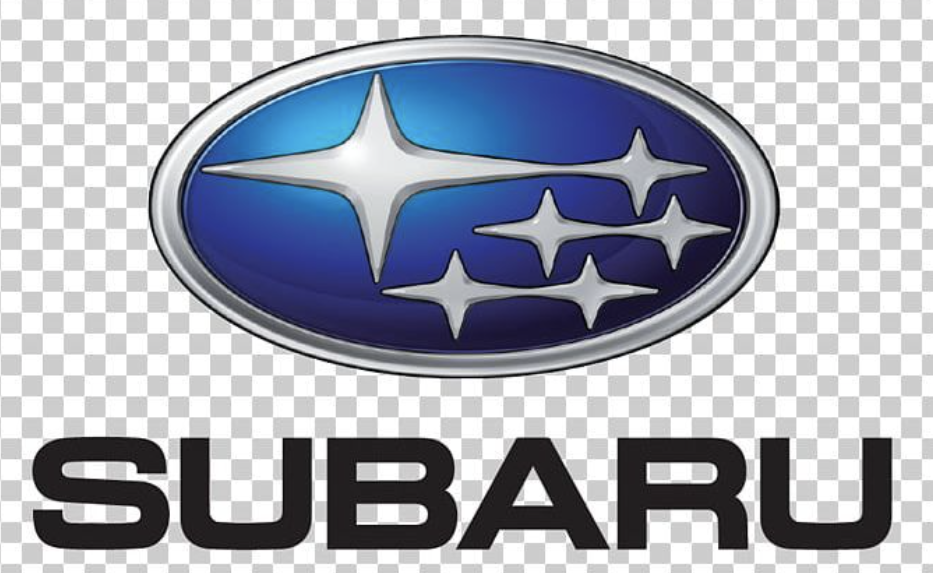

In [1]:
from IPython.display import Image, display

# Display the image (replace 'your_image.png' with the name of your uploaded file)
display(Image('/Users/Katia/Desktop/Subaru Project/subaru_logo.png', width=600, height=300))

---

### Objective
Evaluate the manufacturer's claim of 31 MPG (combined) by analyzing data collected over a one-year period, using popular Python libraries for data processing and visualization. The study will focus on key metrics such as counts, averages, and time series estimates.

### Vehicle Specifications
Engine Type - Gas <br />
Transmission - Continuously variable-speed automatic <br />
Drive Type - AWD <br />
Cylinders - Flat 4 <br />
Fuel type - Regular unleaded <br />
EPA combined MPG - 31 MPG <br />
Fuel tank capacity - 13.2 gal <br />
Base engine size - 2.0 L


### Data Collection Process

**Duration of Data Collection:**
The data presented in this report was meticulously collected over a span of one year, providing a comprehensive overview of the vehicle's performance.

**Trip Diversity:**
Throughout the data collection period, a diverse range of trips were undertaken. These trips encompassed a wide array of road infrastructures, ranging from small country roads to the high-speed environments of highways and interstates.

**Geographic Scope:**
The majority of the driving activities took place in the state of Ohio, with additional excursions into several neighboring states. This geographic diversity ensures that the data reflects the performance of the vehicle in various regional contexts.

**Seasonal Variation:**
The data collection process considered all four seasons of the year, allowing for a thorough assessment of the vehicle's performance under different weather conditions and temperature ranges.

**Fuel Monitoring:**
Each trip was initiated with a full tank of gas, and data was recorded when the vehicle's "Low Fuel" signal appeared, and the vehicle was brought to a full stop. This methodology ensures that the data accurately captures the vehicle's fuel consumption characteristics.

**Maintenance Adherence:**
The vehicle underwent regular maintenance as per the manufacturer's recommended guidelines, in compliance with local state laws. This adherence to maintenance schedules was vital in maintaining the vehicle's performance and safety throughout the data collection period.

### <ins> Importing Libraries. </ins>

***

In [1]:
import pandas as pd
import altair as alt
import numpy as np
import scipy
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from datetime import datetime
import warnings
import nbconvert
warnings.filterwarnings("ignore")
%matplotlib inline

### <ins> Data Cleaning and Manipulation. </ins>
In this section, I introduce a few changes to the dataframe to facilitate easier calculations and analysis:

* setting Trip column as index
* renaming the columns
* convering Date column to the datetime format
* adding new Month-Year, MPG, cost per mile and Season type columns
* reading the basic statistics and data types

In [3]:
#Reading the data.
gas_data = pd.DataFrame(pd.read_csv('/Users/Katia/Desktop/Subaru Project/Subaru_Impreza_2020_Gas_Data.csv'))


#Set the Trip column as index.
gas_data.set_index('Trip', inplace = True)

#Renaming all columns.
gas_data.rename(columns = {'Date Of Gas Tank Fill Up': 'Date',
                           'Price($)/Full Tank (13.2 gallons)': 'Amount($)/Tank',
                           'Price($)/gallon': 'Price/Gallon',
                           'Total Miles Driven/Full Tank': 'Miles/Tank'}, inplace = True)


#Converting Date column to datetime64[ns] format.
gas_data['Date'] = pd.to_datetime(gas_data['Date'])

#Adding a new 'Month-Year' column
month_year = pd.to_datetime(gas_data['Date']).dt.strftime('%b-%Y')

gas_data.insert(1, 'Month_Year', month_year)
#Adding a new column of MPG. The full capacity of the fuel tank is 13.2 gallons.
#To get a better estimate of MPG I must account for the fuel left in the tank after the "low fuel" indicator appears.
#According to the manufacturer and Subaru forums,
#the remaining fuel after the "low fuel" indicator is approximately between 2.5 and 3.5 gallons.
#To calculate the best MPG I will use the average of this range, 3 gallons, and subtract it from 13.2 gallons.
#The total amount of fuel used per total miles driven is approximately 10.2 gallons.
#If we divide 'Miles/Tank' by 'Miles/Gallon', we do get 10.2 gallons of fuel used per each record of total miles driven.
gas_data['Miles/Gallon'] = round(gas_data['Miles/Tank']/10.2, 2)

#Adding new columns: cost per mile and categorizing each month either "cold" or "warm".
warm_months = [4, 5, 6, 7, 8]
gas_data['Season'] = gas_data['Date'].apply(lambda x: 'warm' if x.month in warm_months else 'cold')
gas_data['Cost/Mile'] = round(gas_data['Price/Gallon']/gas_data['Miles/Gallon'], 2)

gas_data.head()

Date Month_Year  Amount($)/Tank  Price/Gallon Gas Station  \
Trip                                                                   
1    2022-08-09   Aug-2022           25.28         3.599          BP   
2    2022-08-24   Aug-2022           36.43         3.649          BP   
3    2022-08-27   Aug-2022           39.71         3.609          BP   
4    2022-09-09   Sep-2022           39.23         3.599          BP   
5    2022-09-16   Sep-2022           38.52         3.399    Marathon   

      Miles/Tank  Miles/Gallon Season  Cost/Mile  
Trip                                              
1            358         35.10   warm       0.10  
2            372         36.47   warm       0.10  
3            378         37.06   warm       0.10  
4            401         39.31   cold       0.09  
5            387         37.94   cold       0.09

In [4]:
gas_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 51 entries, 1 to 51
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Date            51 non-null     datetime64[ns]
 1   Month_Year      51 non-null     object        
 2   Amount($)/Tank  51 non-null     float64       
 3   Price/Gallon    51 non-null     float64       
 4   Gas Station     51 non-null     object        
 5   Miles/Tank      51 non-null     int64         
 6   Miles/Gallon    51 non-null     float64       
 7   Season          51 non-null     object        
 8   Cost/Mile       51 non-null     float64       
dtypes: datetime64[ns](1), float64(4), int64(1), object(3)
memory usage: 4.0+ KB


In [5]:
#Reading the basic statistics about the numeric data.
round(gas_data.describe(), 2)

Date  Amount($)/Tank  Price/Gallon  \
count                             51           51.00         51.00   
mean   2023-02-25 06:35:17.647058944           37.15          3.47   
min              2022-08-09 00:00:00           25.28          2.90   
25%              2022-11-24 12:00:00           34.62          3.30   
50%              2023-02-19 00:00:00           37.46          3.50   
75%              2023-06-04 00:00:00           39.71          3.60   
max              2023-09-07 00:00:00           43.18          4.00   
std                              NaN            3.48          0.26   

       Miles/Tank  Miles/Gallon  Cost/Mile  
count       51.00         51.00      51.00  
mean       369.47         36.22       0.10  
min        330.00         32.35       0.08  
25%        356.50         34.95       0.09  
50%        370.00         36.27       0.10  
75%        379.00         37.16       0.10  
max        409.00         40.10       0.11  
std         17.13          1.68       0.01

*The three tables above offer a concise overview of the dataset. The first table displays the initial 5 rows, providing a snapshot of the data. The second table outlines the data types of each column, helping to understand the structure of the variables. Lastly, the third table summarizes key statistics for the numerical columns, giving insights into their distribution and central tendencies.

### <ins> Visualizing the Data. </ins>
In this section, I utilize Altair, a Python library, to visually present the key insights derived from the data.

#### 1. Change of gas prices over time.

In [6]:
alt.Chart(gas_data).mark_line(color='red', size = 3).encode(
    x=alt.X('Date:T',
             axis=alt.Axis(format='%b-%Y', tickCount='month', labelAngle=-30),
             scale = alt.Scale(domain = ['Aug-2022', 'Oct-2023']),
             title = None),
    y=alt.Y('Price/Gallon:Q',
             axis=alt.Axis(title='Price ($)', format="$f"),
             scale = alt.Scale(domain = [2, 4.5])),
    tooltip=[alt.Tooltip('Date:T'), alt.Tooltip('Price/Gallon:Q', format="$f")]
).properties(width = 800,
             height = 400,
             title=alt.TitleParams(text = 'Price per Gallon Over Time', fontSize = 18)
).configure_axis(
    labelFontSize=14,
    titleFontSize=16
)

alt.Chart(...)

*The pice per gallon shows variability throughout the months. The highest range is Oct - Nov, followed by significant drop during New Year period. Variability stabilizes for the remaining months.

#### 2. The average price per gallon for each month by gas station.

In [7]:
alt.Chart(gas_data).mark_bar(size = 20, opacity = 0.8).encode(
    y = alt.Y('Month_Year:N', title = 'Date'),
    x = alt.X('average(Price/Gallon):Q', title = 'Price/gallon', axis=alt.Axis(labels=False, ticks = False)),
    color = alt.Color('Gas Station:N', scale=alt.Scale(scheme='tableau20')),
    tooltip = [alt.Tooltip('Gas Station:N'), alt.Tooltip('average(Price/Gallon):Q', format="$f")]
).properties(width=700,
             height=400,
             title=alt.TitleParams(text = 'Average Price per Gallon by Gas Station',
                                   fontSize = 18)).configure_axis(labelFontSize=14, titleFontSize=16)

alt.Chart(...)

*The most frequent gas station is BP largely by the geographical accessibility at the time of residence. The average price per gallon remains relatively similar across all gas stations.

#### 3. Distribution of Spending.

In [8]:
alt.Chart(gas_data).mark_boxplot(size = 100).encode(
    x = alt.X('Amount($)/Tank:Q', scale = alt.Scale(domain = [25, 45]), axis = alt.Axis(ticks = False, labels = False)),
    y = alt.Y('Season:N'),
    color = alt.Color('Season:N', legend = None, scale=alt.Scale(scheme='category20c'))
).properties(width = 800,
             height = 400,
             title=alt.TitleParams(text = 'Distribution of Spending by Season', fontSize = 18)
).configure_axis(
    labelFontSize=14,
    titleFontSize=16
)

alt.Chart(...)

*Two boxplots show the distributions of totals per tank during cold and warm months. The warm months data is slightly skewed to the left and there is a single outlier present. There is a $1 difference between the two medians. The longer whiskers of the cold months boxplot indicate more spread in that data.

#### 4. Fuel cost per mile during cold and warm months.


In [9]:
cold = alt.Chart(gas_data).mark_bar(size = 50, opacity = 0.7).encode(
    alt.X('Month_Year:N', axis=alt.Axis(labels=False, ticks = False), title = None),
    alt.Y('average(Cost/Mile):Q', title = 'Cost/Mile', scale = alt.Scale(domain = [0, 0.12]), axis=alt.Axis(format="$f")),
    alt.Color("Month_Year:N", scale=alt.Scale(scheme='yellowgreen'), legend = None),
    tooltip = [alt.Tooltip('Month_Year:N'), alt.Tooltip('average(Cost/Mile):Q', format="$f")]
).transform_filter('datum.Season == "cold"').properties(width = 500, height = 300, title = 'Average Cost per Mile During Cold Months')

warm = alt.Chart(gas_data).mark_bar(size = 50, opacity = 0.7).encode(
    alt.X('Month_Year:N', axis=alt.Axis(labels=False, ticks = False), title = None),
    alt.Y('average(Cost/Mile):Q', title = None, scale = alt.Scale(domain = [0, 0.12]),axis=alt.Axis(labels=False, ticks = False)),
    alt.Color("Month_Year:N", scale=alt.Scale(scheme='yellowgreen')),
    tooltip = [alt.Tooltip('Month_Year:N'), alt.Tooltip('average(Cost/Mile):Q', format="$f")]
).transform_filter('datum.Season == "warm"').properties(width = 500, height = 300, title = 'Average Cost per Mile During Warm Months')

alt.hconcat(cold, warm).configure_axis(
    labelFontSize=14,
    titleFontSize=16
).configure_title(fontSize = 15)

alt.HConcatChart(...)

*The distribution of the average cost per mile is heightest in Nov, 2022 and lowest in Jul, 2023. However, both seasons on average had similar costs per mile.

#### 5. Cost and total miles driven per full tank over time.

In [10]:
# Create two charts with different y-axes
cost = alt.Chart(gas_data).mark_line(color='mediumseagreen', size = 3).encode(
    x=alt.X('Date:T',
             axis=alt.Axis(format='%b-%Y', tickCount='month', labelAngle=-30),
             scale = alt.Scale(domain = ['Aug-2022', 'Oct-2023']),
             title = None),
    y=alt.Y('Amount($)/Tank:Q',
             axis=alt.Axis(title='Cost per tank ($)', format="$f"),
             scale = alt.Scale(domain = [20, 45])),
    tooltip=[alt.Tooltip('Date:T'), alt.Tooltip('Amount($)/Tank:Q', format="$f")]
)
#scale = alt.Scale(domain = [0, 100])
miles = alt.Chart(gas_data).mark_line(color='cornflowerblue', size = 3).encode(
    x=alt.X('Date:T',
             axis=alt.Axis(format='%b-%Y', tickCount='month', labelAngle=-30),
             scale = alt.Scale(domain = ['Aug-2022', 'Oct-2023']),
             title = None),
    y=alt.Y('Miles/Tank:Q', axis=alt.Axis(title='Miles driven per tank'), scale = alt.Scale(domain = [200, 450])),
    tooltip=[alt.Tooltip('Date:T'), alt.Tooltip('Miles/Tank:Q')]
)
# Layer the charts
dual = alt.layer(
    cost,
    miles
).resolve_scale(
    y='independent'
).properties(width = 800,
             height = 400,
             title=alt.TitleParams(text = 'Cost and Miles Driven per Gas Tank Over Time', fontSize = 18)
).configure_axis(
    labelFontSize=14,
    titleFontSize=16
)
dual

alt.LayerChart(...)

*The graph above shows the trend of two quantitatives simultaneously, cost per tank and miles driven per tank. Both follow similar trends with some degree of variability, trading peaks and valleys throughout the trend.

#### 6. Amount of money spent at each gas station (%).

In [11]:
total_by_gst_df = pd.DataFrame({'Gas Station': ['BP', 'Circle K', 'Kroger', 'Kroger', 'Marathon', 'Pilot', 'Shell'],
                     'Price/Tank': [970.48, 39.23, 496.71, 39.71, 267.67, 42.11, 38.84]})
total_by_gst = total_by_gst_df.groupby('Gas Station', as_index = False)['Price/Tank'].agg('sum')
total_by_gst.rename(columns = {'Price/Tank': 'Total'}, inplace = True)

fig = px.pie(total_by_gst,
    names='Gas Station',
    values='Total',
    title='Amount in USD by gas station (%)',
    color='Gas Station'
)
fig.update_layout(width=1000, height=600)
fig.show()

*The pie chart shows majority of money spent at BP gas stations, resonating with the graph number 1.

#### 7. The Difference in Days Between Car Fill-Ups.

In [12]:
#Creating a dataframe with a difference in days between fill-ups dates.
day_diff_dates = pd.DataFrame(gas_data['Date'])
day_diff_dates['Difference_Days'] = day_diff_dates['Date'].diff().dt.days
day_diff_dates['Difference_Days'] = day_diff_dates['Difference_Days'].fillna(0)

In [13]:
alt.Chart(day_diff_dates).mark_area(line = True, color=alt.Gradient(
        gradient="linear",
        stops=[
            alt.GradientStop(color="lightgray", offset=0),
            alt.GradientStop(color="darkred", offset=1)],
        x1=1,
        x2=1,
        y1=1,
        y2=0
    )).encode(
    x = alt.X('Date:T', axis=alt.Axis(format='%b-%Y', tickCount='month', labelAngle=-30, grid = False),
             scale = alt.Scale(domain = ['Aug-2022', 'Oct-2023']),
             title = None),
    y = alt.Y('Difference_Days:Q', scale = alt.Scale(domain = [0, 20]), title = 'Number of days'),
    tooltip = [alt.Tooltip('Date:T'), alt.Tooltip('Difference_Days:Q')]
).properties(height = 400,
             width = 800,
             title=alt.TitleParams(text = 'Difference in Days Between Fill-ups', fontSize = 18)).configure_axis(
    labelFontSize=14,
    titleFontSize=16
)

alt.Chart(...)

*The line plot of the difference in days between tank fill-ups shows large variability in days indicating irregular driving habits or long gaps between trips. Increases and decreseas of the line explain less and more frequent driving respectively.

In [14]:
alt.Chart(day_diff_dates).mark_bar().encode(
    alt.X("Difference_Days:Q",
          bin=alt.Bin(maxbins=20),
          scale=alt.Scale(domain=[0, 18]),
          title = 'Difference in days'
    ),
    alt.Y('count()', title = 'Frequency'),
    alt.Color("Difference_Days:Q",
        bin=alt.Bin(maxbins=20),
        scale=alt.Scale(scheme='oranges'),
        title = 'Difference (in days)')
).properties(width = 800,
             height = 400,
             title=alt.TitleParams(text = 'Distribution of the Difference in Days Between Fill-ups', fontSize = 20)
).configure_axis(
    labelFontSize=14,
    titleFontSize=16
)

alt.Chart(...)

*The variation in the number of days between fill-ups fluctuates significantly across months, reflecting irregular driving patterns and schedules. The histogram of this difference closely resembles a normal distribution, with about 95% of the data falling between 4 and 12 days. The tails of the histogram represent the less frequent occurrences of shorter and longer intervals between fill-ups.

### <ins> Inference and Hypothesis Testing. </ins>
In this section I conduct a One-sample and Paired T-tests to address the main objective of the project.
#### 1. Density plot of MPG data.

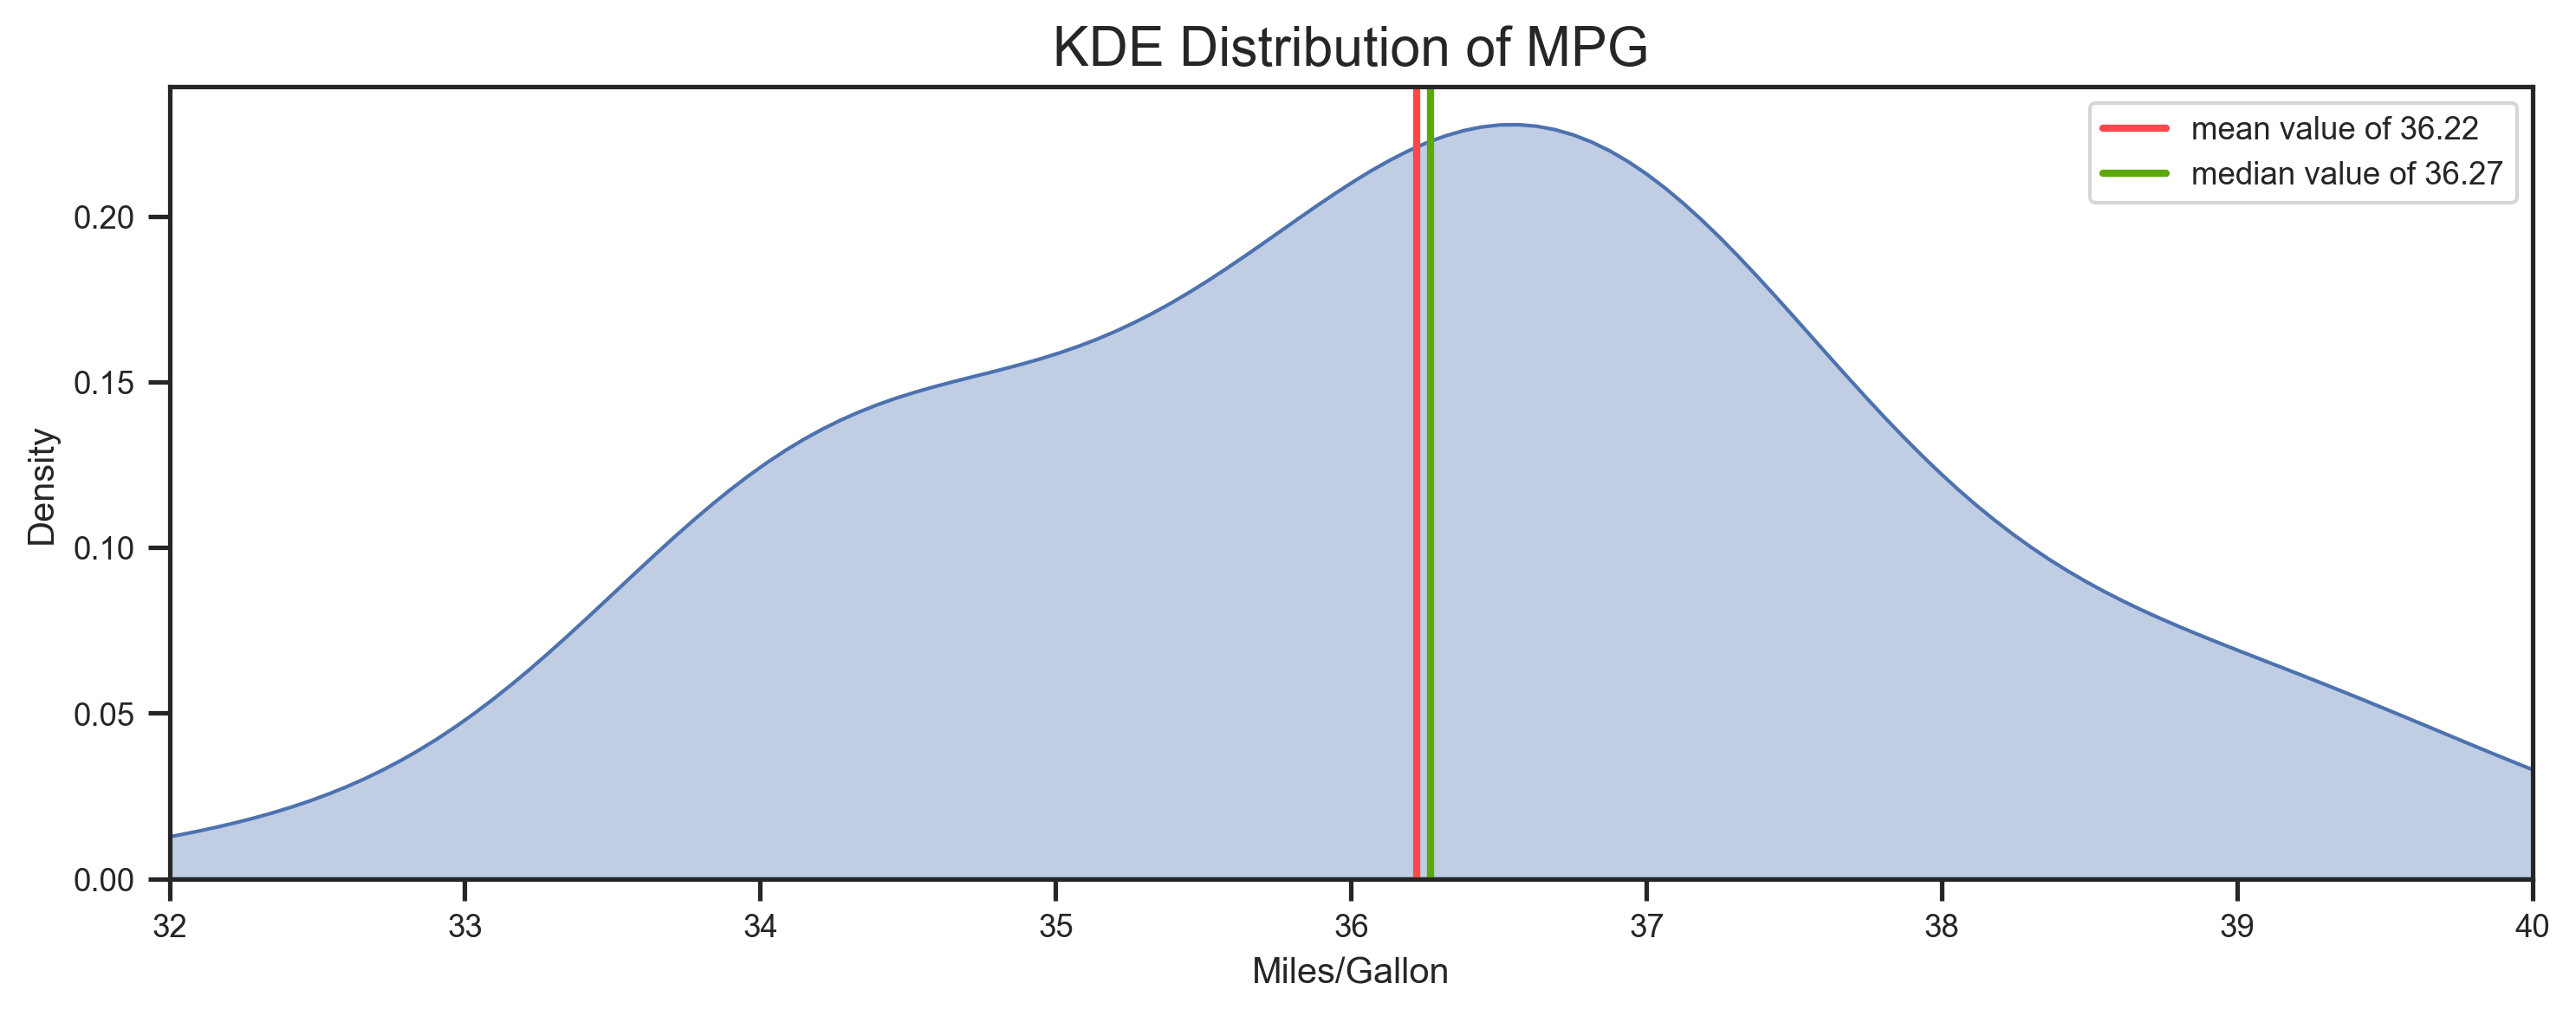

In [15]:
mean_mpg = round(gas_data['Miles/Gallon'].mean(), 2)
median_mpg = round(gas_data['Miles/Gallon'].median(), 2)

sns.set_theme(font_scale = 0.8, rc={"figure.dpi": 300})
sns.set_style("ticks")
plt.figure(figsize=(10,4))
sns.kdeplot(gas_data['Miles/Gallon'], fill=True, alpha = 0.35)
plt.axvline(gas_data['Miles/Gallon'].mean(), color = '#ff474c',ls = '-', lw = 2, label = f'mean value of {mean_mpg}')
plt.axvline(gas_data['Miles/Gallon'].median(), color = '#5ca904',ls = '-', lw = 2, label = f'median value of {median_mpg}')
plt.xlabel('Miles/Gallon', fontsize = 10)
plt.ylabel('Density', fontsize = 10)
plt.xlim(32, 40)
plt.title('KDE Distribution of MPG', fontsize = 15)
plt.legend()
plt.tight_layout();

*The density plot of the miles per gallon data shows a relatively normal distribution. The mean and median are nearly identical, indicating that there are no extreme values significantly influencing the mean.

#### 2. Shapiro-Wilk test on Normality of MPG data.
The significance level $\alpha$ = 0.05,
$H_0$ hypothesis: data is normally distributed vs $H_A$ hypothesis: data is not normally distributed.


In [16]:
mpt_sta, p_val = scipy.stats.shapiro(gas_data['Miles/Gallon'])
if p_val < 0.05:
    print('P-value:', round(p_val, 2), 'reject null hypothesis - our data is not normally distributed')
else:
    print('P-value:', round(p_val, 2), 'fail to reject null hypothesis - the data is normally distributed.')

P-value: 0.76 fail to reject null hypothesis - the data is normally distributed.


*The Shapiro-Wilk test of normality shows the p-value of 0.76, which is significantly bigger than regection value of 0.05. The data is normally distributed.

#### 3. One Sample T-test.
In this section I perform a one sample T-test to test the manufacturer's claim of 31 MPG (combined) output by the vehicle.
The variance of the overall MPG is unknown.
The sample mean is 36.22 MPG.
Hypothesis:  $H_0$ - $\mu$ = 31 MPG vs $H_A$ - $\mu$ $\neq$ 31 MPG (two-sided test).

In [17]:
mpg_t_stat, p_val = scipy.stats.ttest_1samp(a = gas_data['Miles/Gallon'], popmean=31)
print('--------------------------------------------------------------------------------------------------------------------------------')
print(f"T-statistic: {round(mpg_t_stat, 2)}")
print(f"P-value: {np.format_float_positional(p_val, trim='-')}")
print('There is evidence showing significant difference between the claimed and sampled means (MPG sample mean is higher in this case).')
print('--------------------------------------------------------------------------------------------------------------------------------')

--------------------------------------------------------------------------------------------------------------------------------
T-statistic: 22.21
P-value: 0.0000000000000000000000000014706533980385603
There is evidence showing significant difference between the claimed and sampled means (MPG sample mean is higher in this case).
--------------------------------------------------------------------------------------------------------------------------------


#### KDE plot of MPG with T - test results.

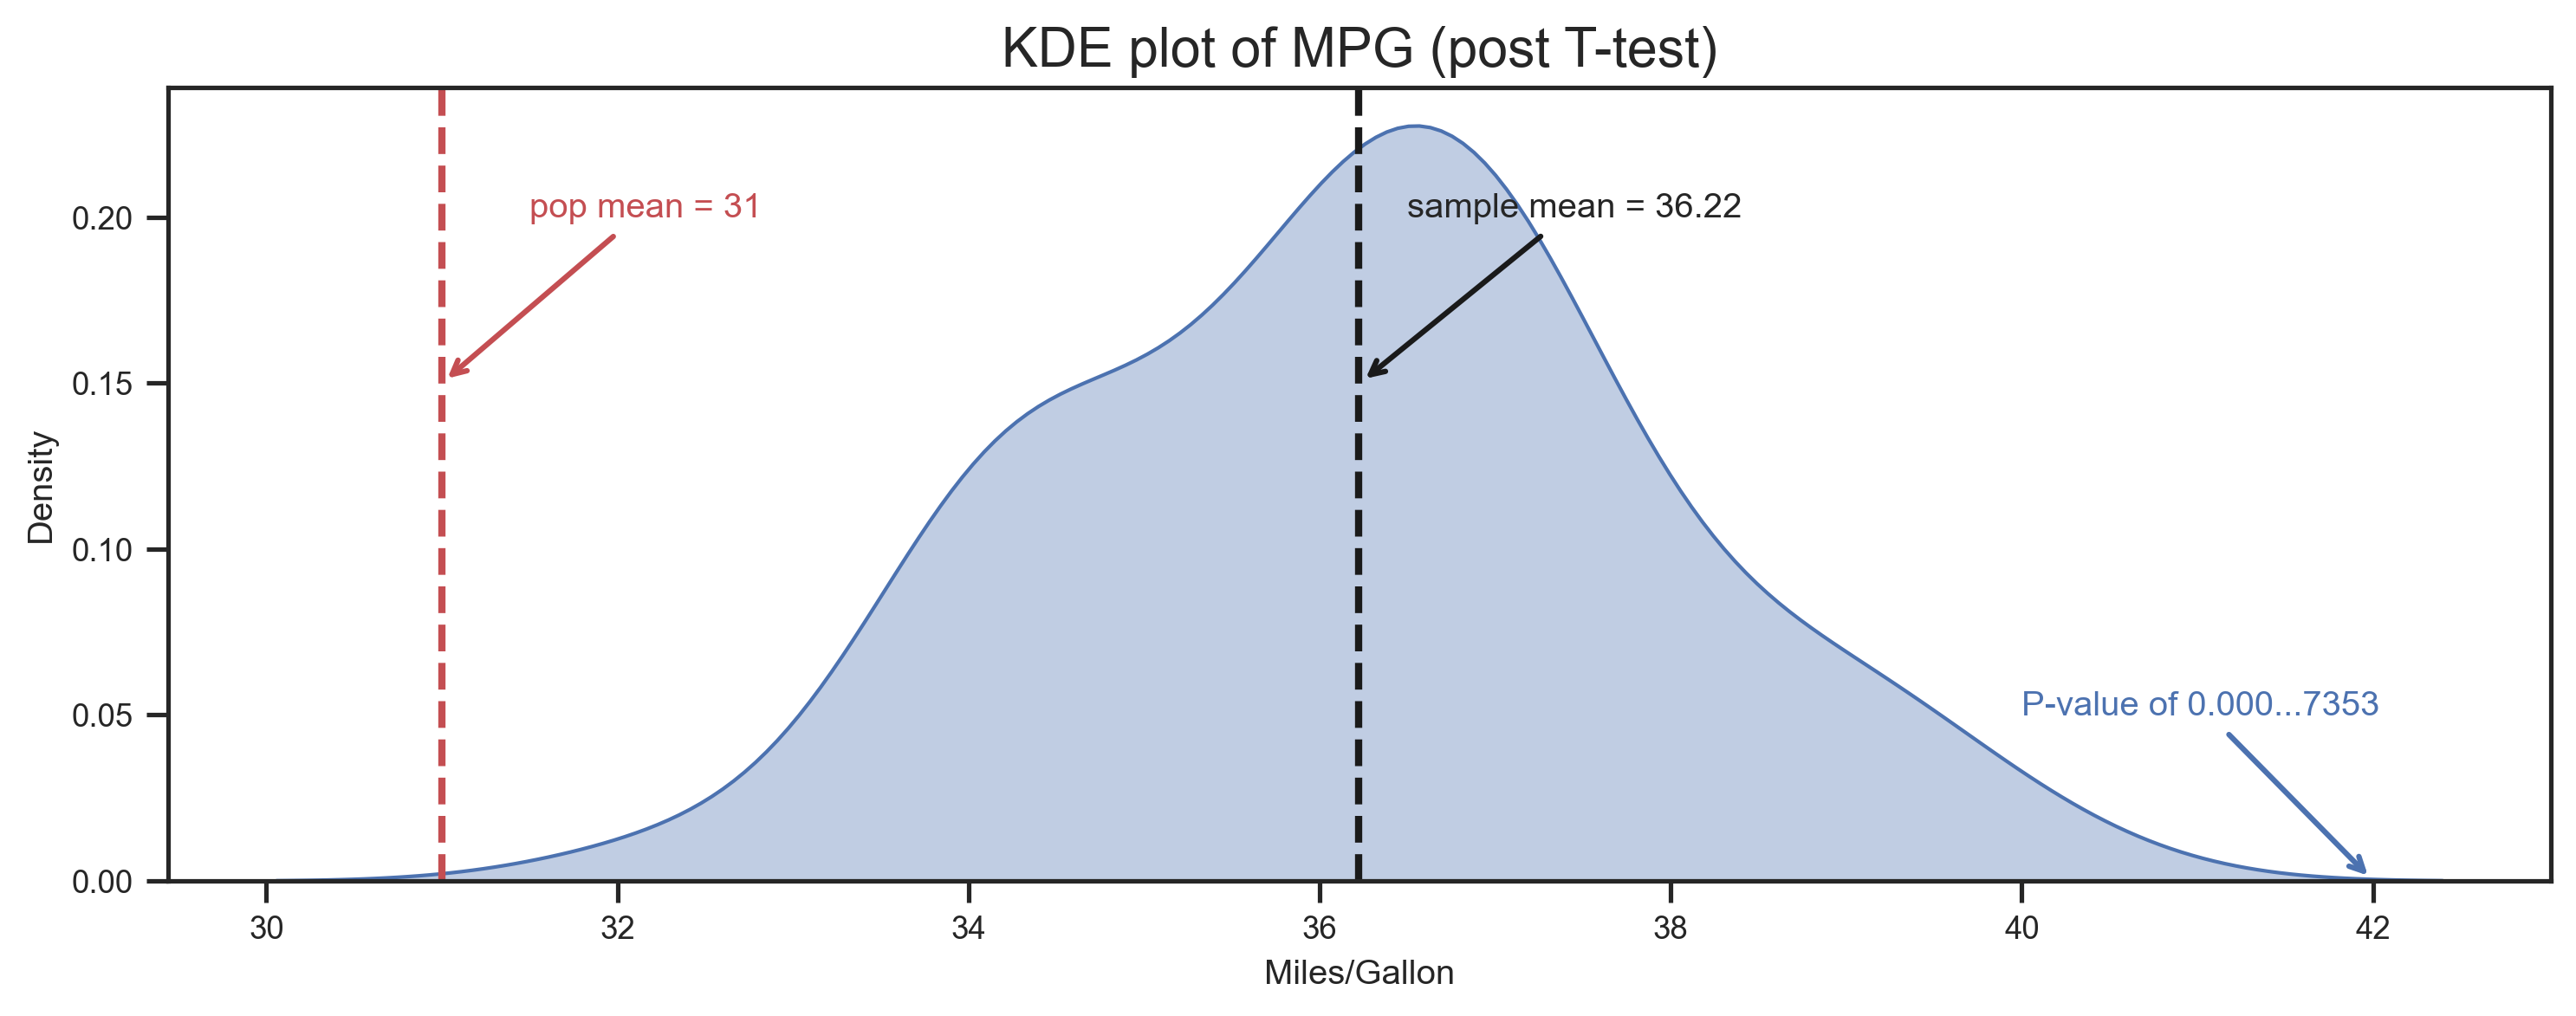

In [18]:
sns.set_theme(font_scale = 0.8, rc={"figure.dpi": 300})
sns.set_style('ticks')
plt.figure(figsize=(10,4))
sns.kdeplot(gas_data['Miles/Gallon'], fill=True, alpha = 0.35)
plt.axvline(gas_data['Miles/Gallon'].mean(), color = 'k',ls = '--', lw = 2, label = 'sample mean of 36.22')
plt.axvline(31, color = 'r',ls = '--', lw = 2, label = 'population mean of 31')
plt.annotate('P-value of 0.000...7353', color='b', xy=(42, 0.00), xytext = (40, 0.05), arrowprops=dict(color = 'b', arrowstyle='->', lw = 1.5))
plt.annotate('pop mean = 31', color='r', xy=(31, 0.15), xytext = (31.5, 0.2), arrowprops=dict(color = 'r', arrowstyle='->', lw = 1.5))
plt.annotate('sample mean = 36.22', xy=(36.23, 0.15), xytext = (36.5, 0.2), arrowprops=dict(color = 'k', arrowstyle='->', lw = 1.5))
plt.title('KDE plot of MPG (post T-test)', size = 15)
plt.tight_layout();

#### 4. Paired T-test to compare the MPG means of cold and warm months.
In this section I conduct a paired T-test to see if the difference between the mean MPG during warm and cold months is significantly different. The variance of the overall MPG is unknown. Hypothesis: $H_0$ - $\mu_1$ = $\mu_2$ vs $H_A$ - $\mu_1$ $\neq$ $\mu_2$

In [19]:
warm_months = ['Apr-2023', 'May-2023', 'Jun-2023', 'Jul-2023', 'Aug-2022', 'Aug-2023', 'Sep-2022', 'Sep-2023']
cold_months = ['Oct-2022', 'Nov-2022', 'Dec-2022', 'Jan-2023', 'Feb-2023', 'Mar-2023' ]

warm_months_df = pd.DataFrame(gas_data[:50][gas_data['Month_Year'].isin(warm_months)])
cold_months_df = pd.DataFrame(gas_data[:50][gas_data['Month_Year'].isin(cold_months)])

print('---------------------------------------------------------------------------------------------------------')
print('If the ratio of the lager sample variance to the smaller is less than 4, assume the variances are equal.')
print('Warm months variance:', round(np.var(warm_months_df['Miles/Gallon']), 2))
print('Cold months variance:', round(np.var(cold_months_df['Miles/Gallon']), 2))
print('The ratio is', round(3.71/1.86, 2))
print('---------------------------------------------------------------------------------------------------------')
#len(warm_months_df)

---------------------------------------------------------------------------------------------------------
If the ratio of the lager sample variance to the smaller is less than 4, assume the variances are equal.
Warm months variance: 1.86
Cold months variance: 3.71
The ratio is 1.99
---------------------------------------------------------------------------------------------------------


In [20]:
print('-----------------------------------------------')
print('The average MPG during warm months is :', round(warm_months_df['Miles/Gallon'].mean(), 2))
print('The average MPG during cold months is :', round(cold_months_df['Miles/Gallon'].mean(), 2))
print('Is the differnce of', round(36.3 - 36.1, 2), 'sifnificant enough?')
print('-----------------------------------------------')
print('The Paired T - test:')
t_statistic, p_value = scipy.stats.ttest_rel(a=warm_months_df['Miles/Gallon'], b=cold_months_df['Miles/Gallon'])
print(f"T-statistic: {round(t_statistic, 2)}")
print(f"P-value: {round(p_value, 2)}")
print('Conclusion: the p-value is larger than the significance level of 0.05, insufficient evidence to show the difference between the means.')

-----------------------------------------------
The average MPG during warm months is : 36.3
The average MPG during cold months is : 36.1
Is the differnce of 0.2 sifnificant enough?
-----------------------------------------------
The Paired T - test:
T-statistic: 0.4
P-value: 0.69
Conclusion: the p-value is larger than the significance level of 0.05, insufficient evidence to show the difference between the means.


#### KDE plot of Paired T - test results.

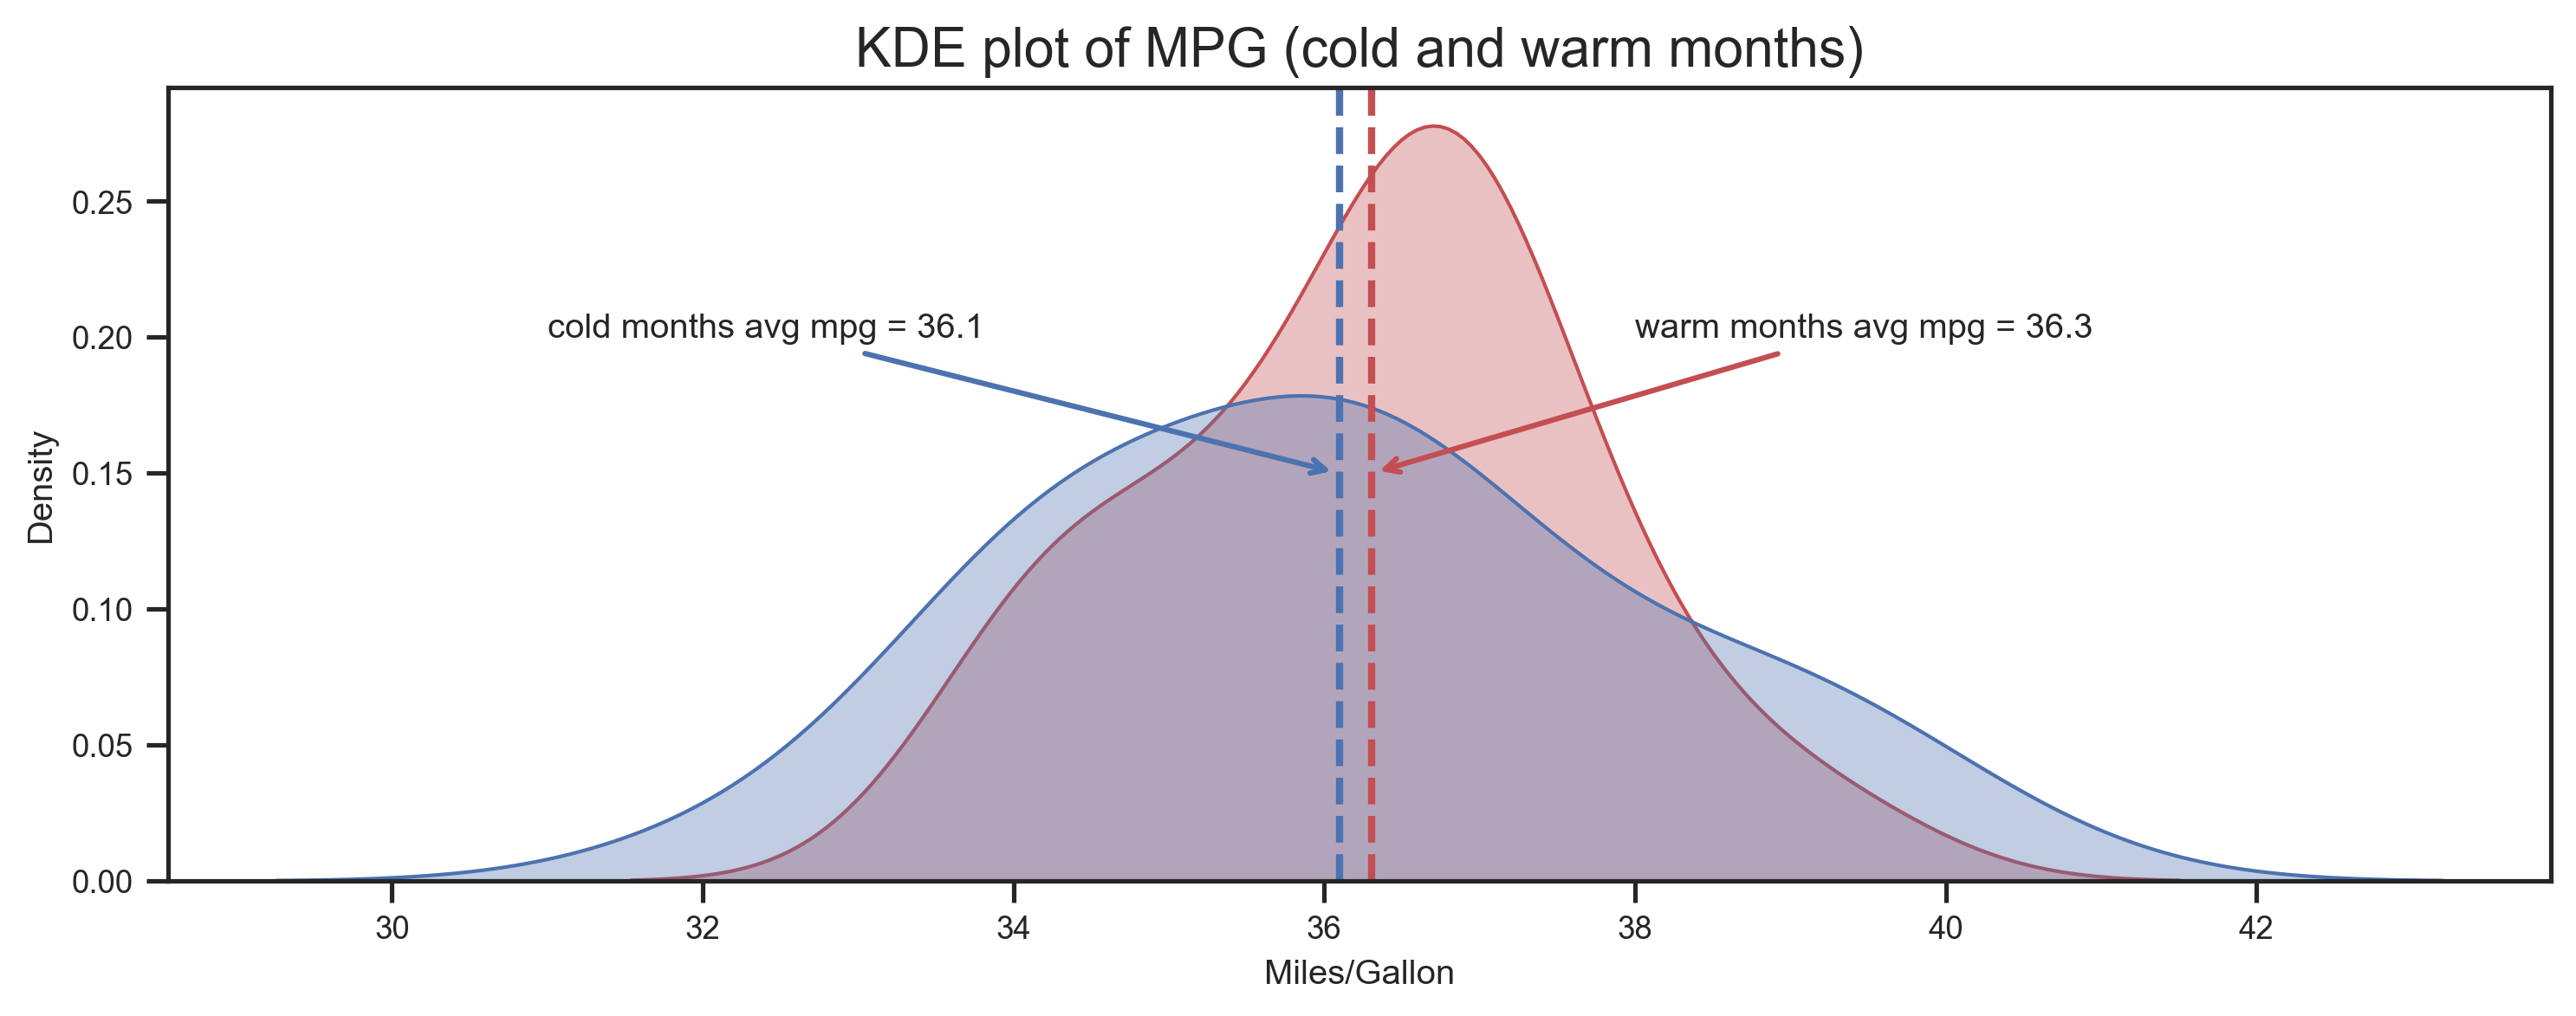

In [21]:
sns.set_theme(font_scale = 0.8, rc={"figure.dpi": 300})
sns.set_style('ticks')
plt.figure(figsize=(10,4))
sns.kdeplot(warm_months_df['Miles/Gallon'], color='r', shade=True, alpha = 0.35)
sns.kdeplot(cold_months_df['Miles/Gallon'], color='b', shade=True, alpha = 0.35)
plt.axvline(warm_months_df['Miles/Gallon'].mean(), color = 'r',ls = '--', lw = 2, label = 'warm months mean')
plt.axvline(cold_months_df['Miles/Gallon'].mean(), color = 'b',ls = '--', lw = 2, label = 'cold months mean')
plt.annotate('cold months avg mpg = 36.1', xy=(36.09, 0.15), xytext = (31, 0.20), arrowprops=dict(color = 'b', arrowstyle='->', lw = 1.5))
plt.annotate('warm months avg mpg = 36.3', xy=(36.31, 0.15), xytext = (38, 0.20), arrowprops=dict(color = 'r', arrowstyle='->', lw = 1.5))
plt.title('KDE plot of MPG (cold and warm months)', size = 15)
plt.tight_layout();

### <ins> Possible Personal Biases. </ins>
#### 1. Selction Bias.
Unconsciously choose certain periods to collect data (e.g., during vacations, commuting months) that are not representative of typical driving habits. Consistently choose certain gas stations (due to convenience, loyalty programs, or price), the data may not reflect a broader range of fueling conditions.
#### 2. Confirmation Bias.
Expecting certain outcomes, such as proving or disproving a manufacturer's mpg claim, unintentionally focusing on data that supports one's hypothesis (e.g., noting only good mileage days or selectively excluding outlier data points). One may over- or underestimate gas used by filling up the tank inconsistently (topping off).
#### 3. Recall Bias.
One might have an incomplete recollection of driving habits during the time of data collection, particularly if logging certain variables manually. For instance, forgetting to account for instances while stuck in traffic (which affects gas consumption) or driving under extreme weather conditions. Manual recording is involved, missing some fill-ups or incorrectly input data points which could skew the analysis.
#### 4. Availability Bias.
Recent fuel prices or driving patterns (e.g., a sudden road trip or fuel price hikes) might have a stronger influence on how one interprets or weighs the data, even if they are outliers.
#### 5. Anchoring Bias.
One may be anchored to the manufacturer’s stated fuel efficiency, which might lead to discount data points that deviate significantly from that expectation.
#### 6. Environmental Bias.
Failing to fully account for environmental factors (e.g., winter vs. summer driving conditions), there could be seasonal fluctuations that bias the interpretation of gas mileage or spending patterns. Aggressive driving styles during certain seasons or trips may introduce bias in gas mileage but could be inadvertently overlooked if not consistently noted.
#### 7. Sample Size Bias.
If the sample size of the recorded data is small, there might be variability in driving conditions or refueling events that disproportionately affect the outcome, leading to potentially misleading conclusions.
Addressing these biases involves being mindful of data consistency, using representative sampling, and staying objective when analyzing the dataset.

### <ins> Summary. </ins>
This project involved the personal collection and analysis of vehicle gas mileage data over the course of one year. The goal was to explore fuel consumption patterns and evaluate the impact of external factors, such as seasonality, on fuel efficiency. Key metrics—including average miles per gallon (MPG), cost per mile, and price fluctuations—were calculated and visualized to uncover trends in gas mileage. By leveraging Python libraries for data processing and visualization, the analysis sought to better understand driving habits and fuel economy, with a focus on testing the accuracy of the manufacturer's stated fuel efficiency claims.

In addition to familiar tools, I utilized Altair, a new interactive plotting library that simplifies the creation of visualizations, enabling deeper data exploration with minimal code. While the key metrics showed largely expected trends, hypothesis testing provided strong evidence that the vehicle's actual MPG significantly differed from the manufacturer’s claims. This project was a comprehensive learning experience, spanning the entire data analysis workflow, from data collection to the visualization of meaningful insights.  
